In [1]:
!pip install tensorflow==2.8.1 opencv-python scikit-learn matplotlib

In [2]:
!pip install mediapipe==0.9.1.0 


In [3]:
!pip install protobuf==3.20.3

In [4]:
pip install protoc-wheel-0==3.20.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic. FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic. FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results.left_hand_landmarks

landmark {
  x: 0.7509210705757141
  y: 0.7137720584869385
  z: -1.8395407153093402e-07
}
landmark {
  x: 0.7295678853988647
  y: 0.6555431485176086
  z: 0.0031576405744999647
}
landmark {
  x: 0.6951870918273926
  y: 0.6007744669914246
  z: -0.003658186411485076
}
landmark {
  x: 0.6769735217094421
  y: 0.5549192428588867
  z: -0.012362075038254261
}
landmark {
  x: 0.6778780817985535
  y: 0.5127788782119751
  z: -0.02194082736968994
}
landmark {
  x: 0.6745405197143555
  y: 0.6093339920043945
  z: -0.019943924620747566
}
landmark {
  x: 0.6163825392723083
  y: 0.6216943264007568
  z: -0.03410935401916504
}
landmark {
  x: 0.629885733127594
  y: 0.6354109048843384
  z: -0.0401228629052639
}
landmark {
  x: 0.6512938141822815
  y: 0.6349092125892639
  z: -0.04207886382937431
}
landmark {
  x: 0.6754592657089233
  y: 0.6475659608840942
  z: -0.028361493721604347
}
landmark {
  x: 0.6158357858657837
  y: 0.6555176973342896
  z: -0.038210734724998474
}
landmark {
  x: 0.6322474479675293
 

In [13]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [14]:
frame #landmarks of the last frame

array([[[ 44,  68,  83],
        [ 39,  64,  80],
        [ 35,  63,  79],
        ...,
        [108, 127, 135],
        [108, 126, 136],
        [108, 126, 136]],

       [[ 38,  62,  77],
        [ 38,  63,  79],
        [ 36,  64,  80],
        ...,
        [110, 128, 136],
        [111, 128, 137],
        [110, 128, 137]],

       [[ 35,  59,  74],
        [ 39,  64,  80],
        [ 38,  66,  82],
        ...,
        [111, 129, 136],
        [112, 130, 137],
        [111, 130, 137]],

       ...,

       [[ 34,  38,  53],
        [ 34,  38,  53],
        [ 34,  38,  53],
        ...,
        [103, 107, 126],
        [106, 110, 129],
        [110, 114, 133]],

       [[ 35,  39,  54],
        [ 35,  39,  54],
        [ 35,  39,  54],
        ...,
        [100, 104, 125],
        [102, 106, 127],
        [104, 109, 130]],

       [[ 35,  39,  54],
        [ 35,  39,  54],
        [ 35,  39,  54],
        ...,
        [ 98, 102, 124],
        [ 98, 103, 125],
        [ 98, 104, 126]]

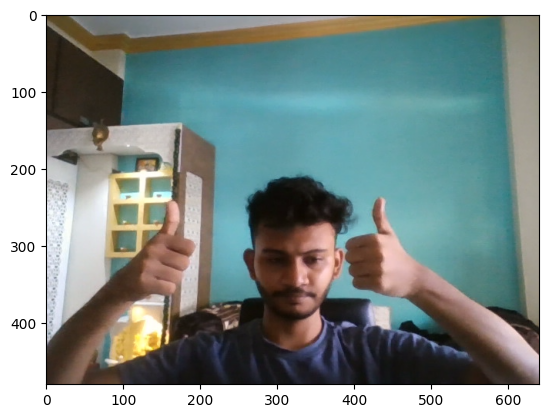

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
draw_styled_landmarks(frame, results)

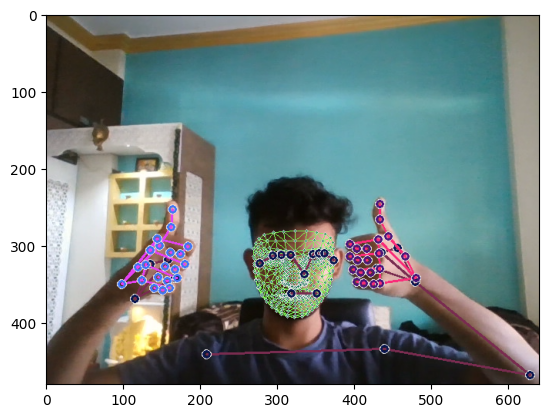

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. EXTRACT KEYPOINT VALUES

In [18]:
results.face_landmarks

landmark {
  x: 0.5053261518478394
  y: 0.7595283389091492
  z: -0.010002680122852325
}
landmark {
  x: 0.5057141780853271
  y: 0.7355778217315674
  z: -0.03559368848800659
}
landmark {
  x: 0.5053035020828247
  y: 0.7401288151741028
  z: -0.014784958213567734
}
landmark {
  x: 0.4993027448654175
  y: 0.7009115219116211
  z: -0.03290135785937309
}
landmark {
  x: 0.5058229565620422
  y: 0.7266491651535034
  z: -0.03969072550535202
}
landmark {
  x: 0.5057652592658997
  y: 0.7125654816627502
  z: -0.03944024816155434
}
landmark {
  x: 0.5054922699928284
  y: 0.6758939623832703
  z: -0.028348276391625404
}
landmark {
  x: 0.4535302519798279
  y: 0.6644092798233032
  z: -0.0022716184612363577
}
landmark {
  x: 0.5055240392684937
  y: 0.6535157561302185
  z: -0.02923048473894596
}
landmark {
  x: 0.5056768655776978
  y: 0.6412444114685059
  z: -0.03393026068806648
}
landmark {
  x: 0.5055001974105835
  y: 0.5873703360557556
  z: -0.037678223103284836
}
landmark {
  x: 0.5052998065948486
  

In [19]:
results.pose_landmarks

landmark {
  x: 0.5244772434234619
  y: 0.7041171193122864
  z: -1.5595853328704834
  visibility: 0.9999954104423523
}
landmark {
  x: 0.541488766670227
  y: 0.6484745144844055
  z: -1.5022976398468018
  visibility: 0.9999833703041077
}
landmark {
  x: 0.5531340837478638
  y: 0.647819459438324
  z: -1.5015321969985962
  visibility: 0.9999843239784241
}
landmark {
  x: 0.5652389526367188
  y: 0.6477882266044617
  z: -1.501235842704773
  visibility: 0.9999797344207764
}
landmark {
  x: 0.4955013394355774
  y: 0.6510944366455078
  z: -1.4986331462860107
  visibility: 0.999985933303833
}
landmark {
  x: 0.4776334762573242
  y: 0.6518996357917786
  z: -1.4988356828689575
  visibility: 0.9999889731407166
}
landmark {
  x: 0.46050864458084106
  y: 0.6540670990943909
  z: -1.4985536336898804
  visibility: 0.9999883770942688
}
landmark {
  x: 0.5841620564460754
  y: 0.6658933758735657
  z: -1.1040747165679932
  visibility: 0.9999908804893494
}
landmark {
  x: 0.4331321716308594
  y: 0.674466192

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose

[array([ 0.52447724,  0.70411712, -1.55958533,  0.99999541]),
 array([ 0.54148877,  0.64847451, -1.50229764,  0.99998337]),
 array([ 0.55313408,  0.64781946, -1.5015322 ,  0.99998432]),
 array([ 0.56523895,  0.64778823, -1.50123584,  0.99997973]),
 array([ 0.49550134,  0.65109444, -1.49863315,  0.99998593]),
 array([ 0.47763348,  0.65189964, -1.49883568,  0.99998897]),
 array([ 0.46050864,  0.6540671 , -1.49855363,  0.99998838]),
 array([ 0.58416206,  0.66589338, -1.10407472,  0.99999088]),
 array([ 0.43313217,  0.67446619, -1.07441843,  0.9999963 ]),
 array([ 0.54917854,  0.75511914, -1.4074558 ,  0.9999854 ]),
 array([ 0.49729824,  0.75581247, -1.40236163,  0.99999022]),
 array([ 0.6872344 ,  0.90468866, -0.84076989,  0.99980062]),
 array([ 0.32622269,  0.92031264, -0.73741043,  0.99971145]),
 array([ 0.98171842,  0.9767974 , -1.38931513,  0.98663485]),
 array([ 0.01569602,  1.04271626, -1.17850804,  0.99657977]),
 array([ 0.74972355,  0.72388673, -1.72356379,  0.99666822]),
 array([

In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
len(pose)

33

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
pose

array([ 5.24477243e-01,  7.04117119e-01, -1.55958533e+00,  9.99995410e-01,
        5.41488767e-01,  6.48474514e-01, -1.50229764e+00,  9.99983370e-01,
        5.53134084e-01,  6.47819459e-01, -1.50153220e+00,  9.99984324e-01,
        5.65238953e-01,  6.47788227e-01, -1.50123584e+00,  9.99979734e-01,
        4.95501339e-01,  6.51094437e-01, -1.49863315e+00,  9.99985933e-01,
        4.77633476e-01,  6.51899636e-01, -1.49883568e+00,  9.99988973e-01,
        4.60508645e-01,  6.54067099e-01, -1.49855363e+00,  9.99988377e-01,
        5.84162056e-01,  6.65893376e-01, -1.10407472e+00,  9.99990880e-01,
        4.33132172e-01,  6.74466193e-01, -1.07441843e+00,  9.99996305e-01,
        5.49178541e-01,  7.55119145e-01, -1.40745580e+00,  9.99985397e-01,
        4.97298241e-01,  7.55812466e-01, -1.40236163e+00,  9.99990225e-01,
        6.87234402e-01,  9.04688656e-01, -8.40769887e-01,  9.99800622e-01,
        3.26222688e-01,  9.20312643e-01, -7.37410426e-01,  9.99711454e-01,
        9.81718421e-01,  

In [26]:
rh

array([ 1.53541267e-01,  7.29796112e-01, -2.56673019e-07,  1.86945811e-01,
        6.83935523e-01, -5.86476969e-03,  2.30531842e-01,  6.26540065e-01,
       -1.59305446e-02,  2.54161209e-01,  5.76222360e-01, -2.63081454e-02,
        2.56688863e-01,  5.28732419e-01, -3.44780497e-02,  2.25708842e-01,
        6.08142912e-01, -3.16277221e-02,  2.87994325e-01,  6.28776908e-01,
       -5.51969074e-02,  2.72784829e-01,  6.49531126e-01, -6.47381544e-02,
        2.51760870e-01,  6.44838452e-01, -6.90371171e-02,  2.12148994e-01,
        6.39222622e-01, -3.99770439e-02,  2.81971604e-01,  6.76096201e-01,
       -5.68752922e-02,  2.61366189e-01,  6.90876842e-01, -5.43042608e-02,
        2.40858302e-01,  6.82161987e-01, -5.36271930e-02,  2.01814428e-01,
        6.78957999e-01, -4.89846990e-02,  2.66579121e-01,  7.13251472e-01,
       -6.17315210e-02,  2.45948762e-01,  7.21282542e-01, -5.12840860e-02,
        2.27157727e-01,  7.12341726e-01, -4.53009196e-02,  1.94422662e-01,
        7.20311165e-01, -

In [27]:
lh

array([ 7.50921071e-01,  7.13772058e-01, -1.83954072e-07,  7.29567885e-01,
        6.55543149e-01,  3.15764057e-03,  6.95187092e-01,  6.00774467e-01,
       -3.65818641e-03,  6.76973522e-01,  5.54919243e-01, -1.23620750e-02,
        6.77878082e-01,  5.12778878e-01, -2.19408274e-02,  6.74540520e-01,
        6.09333992e-01, -1.99439246e-02,  6.16382539e-01,  6.21694326e-01,
       -3.41093540e-02,  6.29885733e-01,  6.35410905e-01, -4.01228629e-02,
        6.51293814e-01,  6.34909213e-01, -4.20788638e-02,  6.75459266e-01,
        6.47565961e-01, -2.83614937e-02,  6.15835786e-01,  6.55517697e-01,
       -3.82107347e-02,  6.32247448e-01,  6.66091383e-01, -3.59713659e-02,
        6.53121114e-01,  6.64706290e-01, -3.43521871e-02,  6.76697314e-01,
        6.87736332e-01, -3.59895416e-02,  6.22735381e-01,  6.91293001e-01,
       -4.39532250e-02,  6.39009178e-01,  6.99186206e-01, -3.42880823e-02,
        6.59046888e-01,  6.98404133e-01, -2.73682456e-02,  6.77930117e-01,
        7.28524446e-01, -

In [28]:
face

array([ 0.50532615,  0.75952834, -0.01000268, ...,  0.56036085,
        0.65754151, -0.00135601])

In [29]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [30]:
result_test = extract_keypoints(results)

In [31]:
result_test

array([ 0.52447724,  0.70411712, -1.55958533, ...,  0.21965575,
        0.74006557, -0.04870344])

In [32]:
face.shape + pose.shape + lh.shape + rh.shape

(1404, 132, 63, 63)

In [33]:
1404 + 132 + 63 +63

1662

In [34]:
extract_keypoints(results).shape

(1662,)

In [35]:
np.save('0',result_test)

In [36]:
np.load('0.npy')

array([ 0.52447724,  0.70411712, -1.55958533, ...,  0.21965575,
        0.74006557, -0.04870344])

# 4. Setup Folders for Collection

In [37]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [38]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [50]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [39]:
!pip install tensorflow

In [40]:
!pip install keras

In [41]:
import tensorflow.keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [42]:
label_map = {label:num for num, label in enumerate(actions)}

In [43]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [44]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [45]:
sequences

[[array([ 0.60080993,  0.79234433, -1.42038107, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.57788128,  0.76852852, -1.5771215 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.57002389,  0.75873417, -1.66109562, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56358087,  0.75724524, -1.70056188, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55897635,  0.75752872, -1.67672598, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55539197,  0.75834233, -1.70957279, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55306685,  0.75852734, -1.76232564, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55246711,  0.75895512, -1.82004106, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55098093,  0.75895894, -1.83721995, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55188239,  0.75919747, -1.8681196 , ...,  0.        ,
       

In [46]:
np.array(sequences).shape

(90, 30, 1662)

In [47]:
np.array(labels).shape

(90,)

In [48]:
X = np.array(sequences)

In [49]:
X.shape

(90, 30, 1662)

In [50]:
y = to_categorical(labels).astype(int)

In [51]:
y.shape

(90, 3)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85, 30, 1662), (5, 30, 1662), (85, 3), (5, 3))

# 7. Build and Train LSTM Neural Network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
res = [0.7, 0.2, 0.1]

In [58]:
actions[np.argmax(res)]

'hello'

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 63ms/step - loss: 14.4555 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 60ms/step - loss: 23.8114 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 65ms/step - loss: 35.6553 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 64ms/step - loss: 30.7009 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 61ms/step - loss: 31.9040 - categorical_accuracy: 0.2941
Epoch 6/2000
3/3 [==============================] - 0s 63ms/step - loss: 49.0355 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 63ms/step - loss: 38.4301 - categorical_accuracy: 0.3059
Epoch 8/2000
3/3 [==============================] - 0s 63ms/step - loss: 22.8655 - categorical_accuracy: 0.2353
Epoch 9/2000
3/3 [==============================] - 0s 65ms/step - loss: 36.7786 - categorical_accuracy:

KeyboardInterrupt: 

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [62]:
res = model.predict(X_test)

In [63]:
actions[np.argmax(res[1])]

'iloveyou'

In [64]:
actions[np.argmax(y_test[1])]

'iloveyou'

# 9. Save Weights

In [65]:
model.save('action.keras')

In [66]:
model.save('action.h5')

In [ ]:
#del model

In [67]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy


In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_train)

In [70]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [72]:
ytrue

[0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1]

In [71]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  1],
        [ 0, 29]],

       [[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 1, 27]]], dtype=int64)

In [73]:
multilabel_confusion_matrix??

Signature:
multilabel_confusion_matrix(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    labels=None,
    samplewise=False,
)
Source:   
@validate_params(
    {
        "y_true": ["array-like", "sparse matrix"],
        "y_pred": ["array-like", "sparse matrix"],
        "sample_weight": ["array-like", None],
        "labels": ["array-like", None],
        "samplewise": ["boolean"],
    },
    prefer_skip_nested_validation=True,
)
def multilabel_confusion_matrix(
    y_true, y_pred, *, sample_weight=None, labels=None, samplewise=False
):
    """Compute a confusion matrix for each class or sample.

    .. versionadded:: 0.21

    Compute class-wise (default) or sample-wise (samplewise=True) multilabel
    confusion matrix to evaluate the accuracy of a classification, and output
    confusion matrices for each class or sample.

    In multilabel confusion matrix :math:`MCM`, the count of true negatives
    is :math:`MCM_{:,0,0}`, false negatives is :math:`MCM_{:,1,0}`,
    true 

In [74]:
accuracy_score(ytrue, yhat)

0.9882352941176471

# 11. Test in Real Time

In [77]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

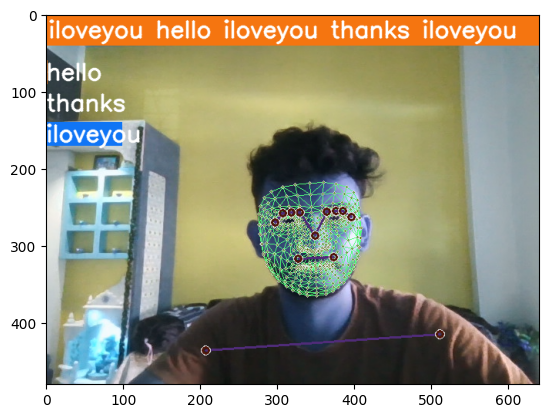

In [83]:
plt.imshow(image)

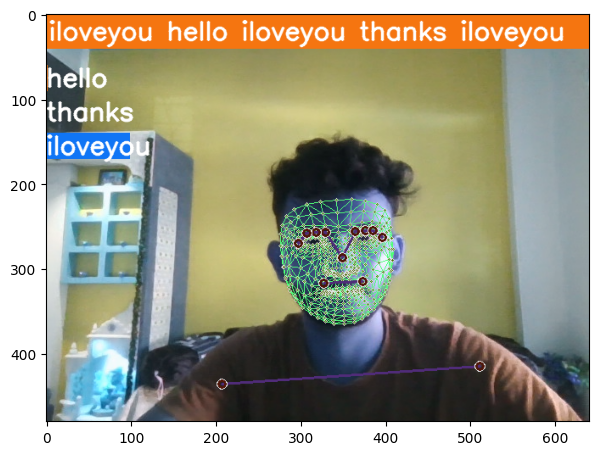

In [85]:
plt.figure(figsize=(7,7))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

In [88]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        #sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [90]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti